In [27]:
import json

with open('results.json') as f:
    results = json.load(f)

In [28]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 30)
    fig.set_size_inches(40, 7)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [30]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a, _ in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    print("\nTop-n images with largest absolute values of logits:")
    plot_instances(pair["feature"])
    print(100 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. four: 0.4515
	2. round: 0.3099
	3. is: 0.2744
	4. color: 0.1908
	5. this: 0.1889
	6. green: 0.1763
	7. blue: 0.1182
	8. right: 0.1021
	9. red: 0.0832
	10. left: 0.0811
	11. canvas: 0.0451
	12. up: 0.0180
	13. bottom: 0.0082
	14. three: 0.0000
	15. has: 0.0000
	16. angle: 0.0000
	17. white: 0.0000
	18. rotate: 0.0000
	19. position: 0.0000
	20. shape: 0.0000
	21. unrotate: 0.0000
	22. blank: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


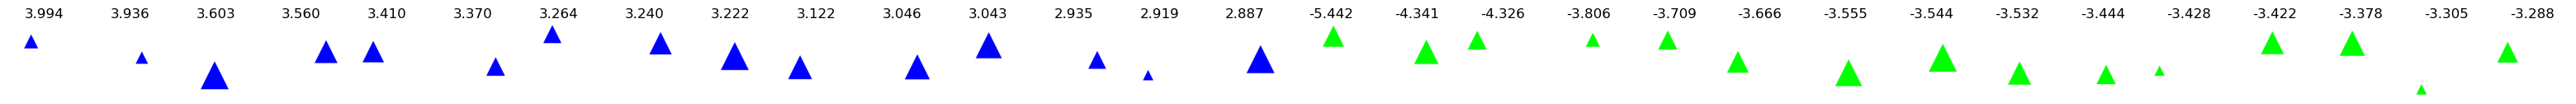

----------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. color: 0.3730
	2. round: 0.3475
	3. green: 0.3064
	4. position: 0.3048
	5. is: 0.2869
	6. left: 0.0164
	7. four: 0.0000
	8. has: 0.0000
	9. angle: 0.0000
	10. three: 0.0000
	11. blue: 0.0000
	12. red: 0.0000
	13. white: 0.0000
	14. up: 0.0000
	15. rotate: 0.0000
	16. shape: 0.0000
	17. canvas: 0.0000
	18. this: 0.0000
	19. unrotate: 0.0000
	20. bottom: 0.0000
	21. right: 0.0000
	22. blank: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


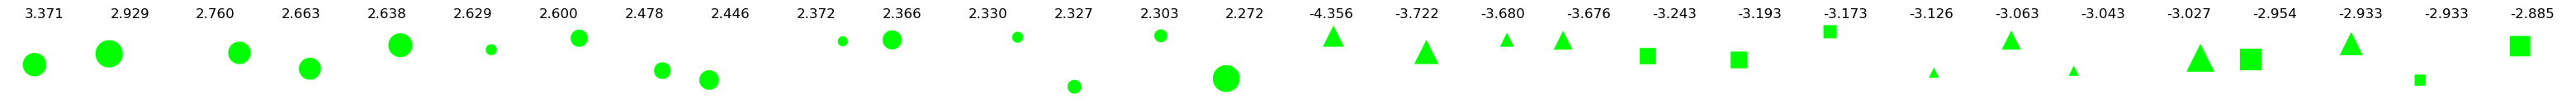

----------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. angle: 0.3630
	2. three: 0.3307
	3. round: 0.2109
	4. blue: 0.2023
	5. green: 0.1387
	6. white: 0.1350
	7. bottom: 0.1039
	8. right: 0.0928
	9. blank: 0.0884
	10. is: 0.0829
	11. left: 0.0718
	12. this: 0.0577
	13. shape: 0.0513
	14. has: 0.0477
	15. four: 0.0472
	16. red: 0.0364
	17. position: 0.0151
	18. up: 0.0059
	19. color: 0.0000
	20. <pad>: 0.0000
	21. unrotate: 0.0000
	22. canvas: 0.0000
	23. rotate: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


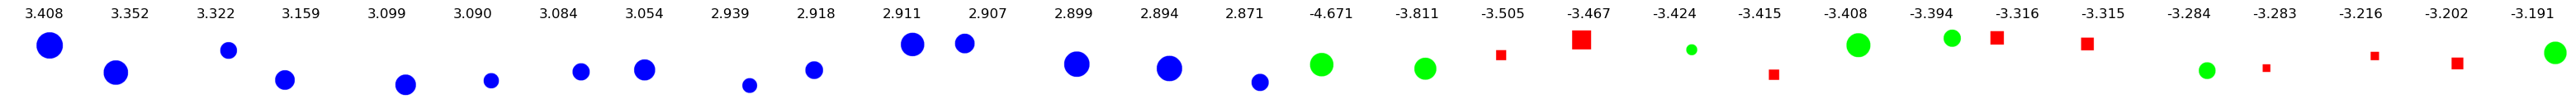

----------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. white: 0.1782
	2. canvas: 0.1654
	3. blank: 0.1412
	4. shape: 0.1394
	5. left: 0.1353
	6. blue: 0.1319
	7. is: 0.1163
	8. bottom: 0.1120
	9. color: 0.1057
	10. rotate: 0.0983
	11. this: 0.0722
	12. has: 0.0504
	13. position: 0.0479
	14. four: 0.0183
	15. three: 0.0139
	16. round: 0.0109
	17. up: 0.0012
	18. green: 0.0000
	19. right: 0.0000
	20. red: 0.0000
	21. unrotate: 0.0000
	22. angle: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


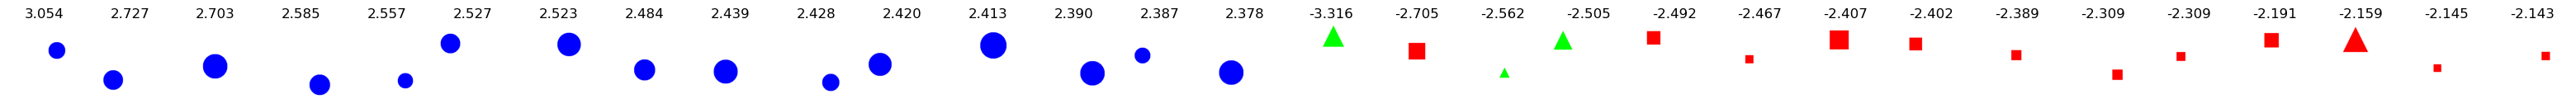

----------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. has: 0.3094
	2. this: 0.2274
	3. four: 0.1634
	4. bottom: 0.1582
	5. red: 0.1571
	6. color: 0.1505
	7. position: 0.0957
	8. up: 0.0768
	9. shape: 0.0480
	10. right: 0.0473
	11. blank: 0.0162
	12. rotate: 0.0150
	13. left: 0.0093
	14. canvas: 0.0031
	15. <pad>: 0.0000
	16. is: 0.0000
	17. round: 0.0000
	18. green: 0.0000
	19. blue: 0.0000
	20. unrotate: 0.0000
	21. white: 0.0000
	22. three: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


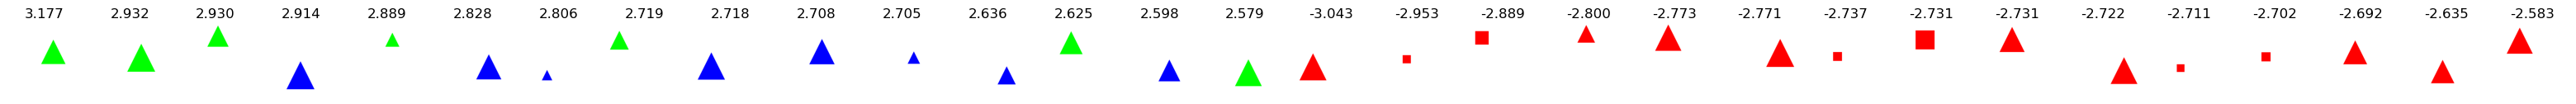

----------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. round: 0.2947
	2. green: 0.2777
	3. four: 0.2701
	4. has: 0.1966
	5. shape: 0.1572
	6. color: 0.1537
	7. canvas: 0.1436
	8. this: 0.0975
	9. red: 0.0949
	10. white: 0.0063
	11. is: 0.0024
	12. left: 0.0006
	13. blue: 0.0000
	14. <pad>: 0.0000
	15. three: 0.0000
	16. bottom: 0.0000
	17. unrotate: 0.0000
	18. blank: 0.0000
	19. position: 0.0000
	20. right: 0.0000
	21. rotate: 0.0000
	22. up: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


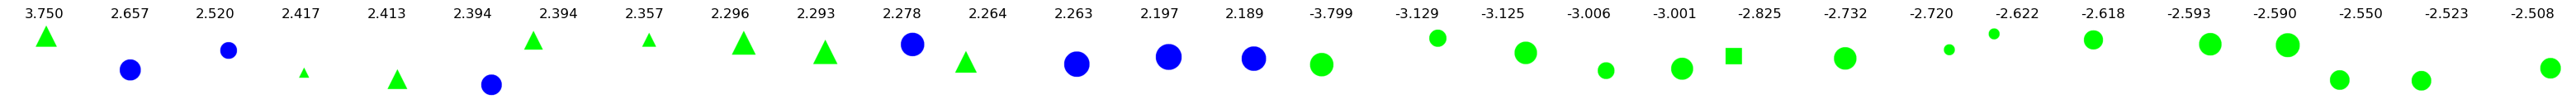

----------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. red: 0.2620
	2. has: 0.2151
	3. color: 0.1991
	4. canvas: 0.1367
	5. this: 0.1345
	6. position: 0.1147
	7. bottom: 0.1064
	8. shape: 0.0940
	9. four: 0.0833
	10. up: 0.0115
	11. right: 0.0010
	12. blank: 0.0008
	13. rotate: 0.0006
	14. <pad>: 0.0000
	15. is: 0.0000
	16. round: 0.0000
	17. green: 0.0000
	18. blue: 0.0000
	19. unrotate: 0.0000
	20. white: 0.0000
	21. left: 0.0000
	22. three: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


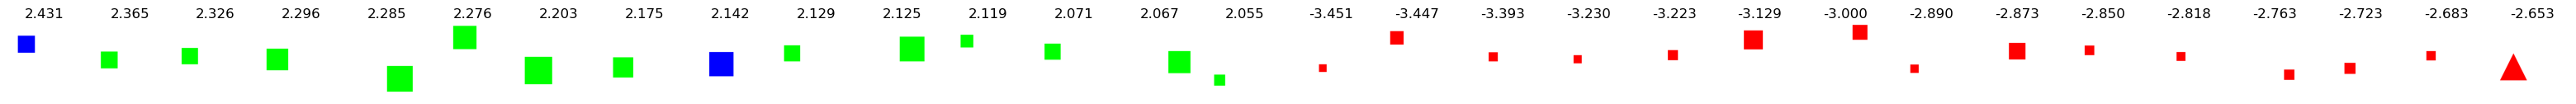

----------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. color: 0.4612
	2. canvas: 0.2138
	3. four: 0.2136
	4. position: 0.1835
	5. has: 0.0998
	6. red: 0.0052
	7. left: 0.0034
	8. is: 0.0008
	9. rotate: 0.0002
	10. <pad>: 0.0000
	11. round: 0.0000
	12. three: 0.0000
	13. right: 0.0000
	14. bottom: 0.0000
	15. green: 0.0000
	16. blue: 0.0000
	17. white: 0.0000
	18. unrotate: 0.0000
	19. shape: 0.0000
	20. this: 0.0000
	21. blank: 0.0000
	22. up: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


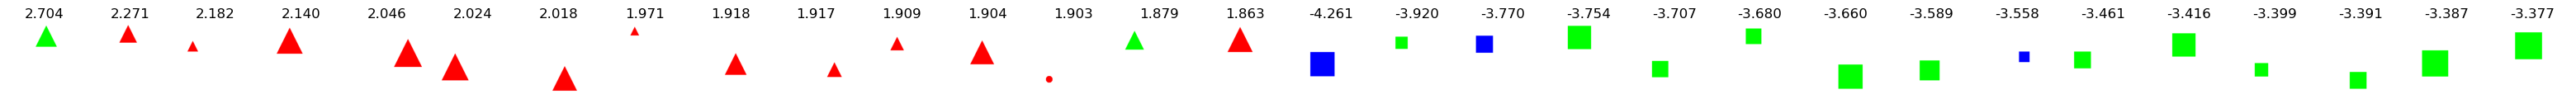

----------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. green: 0.2650
	2. red: 0.2151
	3. four: 0.1839
	4. this: 0.1727
	5. position: 0.1390
	6. shape: 0.1301
	7. has: 0.1267
	8. round: 0.1239
	9. bottom: 0.1021
	10. angle: 0.0984
	11. is: 0.0873
	12. up: 0.0403
	13. right: 0.0306
	14. rotate: 0.0280
	15. blank: 0.0240
	16. white: 0.0070
	17. left: 0.0001
	18. blue: 0.0000
	19. three: 0.0000
	20. <pad>: 0.0000
	21. unrotate: 0.0000
	22. color: 0.0000
	23. canvas: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


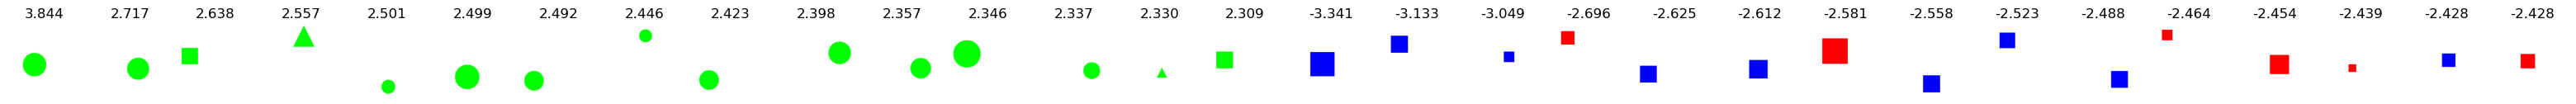

----------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. red: 0.4522
	2. green: 0.2593
	3. this: 0.2429
	4. is: 0.2420
	5. round: 0.2062
	6. canvas: 0.1617
	7. shape: 0.0907
	8. three: 0.0861
	9. four: 0.0769
	10. white: 0.0481
	11. blank: 0.0172
	12. bottom: 0.0159
	13. right: 0.0152
	14. left: 0.0102
	15. rotate: 0.0053
	16. color: 0.0053
	17. up: 0.0032
	18. blue: 0.0000
	19. angle: 0.0000
	20. has: 0.0000
	21. unrotate: 0.0000
	22. position: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


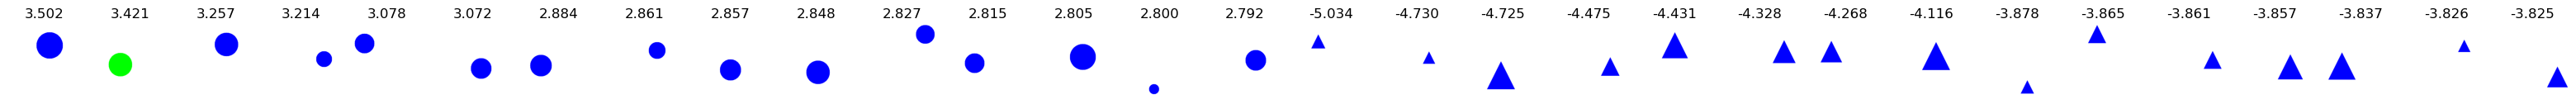

----------------------------------------------------------------------------------------------------


In [31]:
for i in range(10):

    visualize_concept(i)

In [32]:
import torch
top_k = 2

# (3, 5) -> (5, 2)
logits = torch.tensor([[11, 14, 17, 20, 23], [12, 15, 18, 21, 24], [13, 16, 19, 22, 25]])

topk_lrg = torch.topk(logits.T, k=top_k, dim=1, largest=True)

In [33]:
topk_lrg

torch.return_types.topk(
values=tensor([[13, 12],
        [16, 15],
        [19, 18],
        [22, 21],
        [25, 24]]),
indices=tensor([[2, 1],
        [2, 1],
        [2, 1],
        [2, 1],
        [2, 1]]))